In [1]:
'''
Heart Failure Prediction Using KNN(K-Nearest Neighbour)
Group Members:
Priyanshi Pankhaniya(216270307066)
Honey Modha(216270307065)
Sanjana Gohel(216270307093)
'''

'''
We have the following values present in the dataset -

1) age

2) sex: sex (1 = male; 0 = female)

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6) fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11) the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack
'''

#Importing the Libraries
import numpy as np
import pandas as pd

#For Model Selection
from sklearn.model_selection import train_test_split

#Importing the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing,neighbors
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv');
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [2]:
# Displaying the first few rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

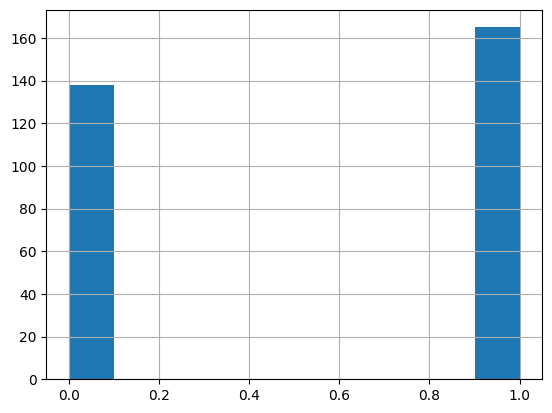

In [3]:
#Implementing the HistoGram
data["target"].hist()

In [4]:
#Importing the Seaborn 
import seaborn as sns

<Axes: xlabel='target', ylabel='age'>

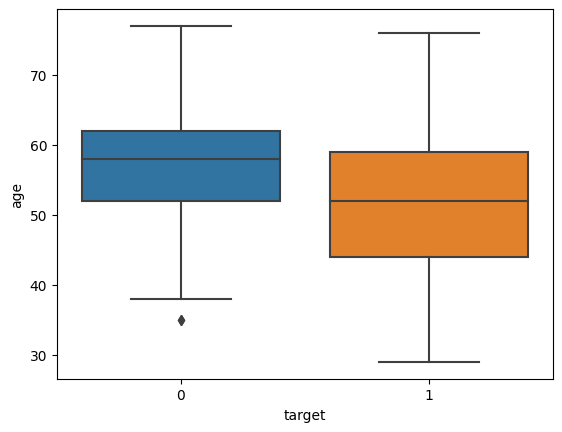

In [5]:
#Implementing the Box plot of the Age and the Target
sns.boxplot(data=data, y="age",x="target")

In [6]:
data["sex"].value_counts()#Disease is present in male population more than females

sex
1    207
0     96
Name: count, dtype: int64

In [7]:
# Separating the features and the target
X=data.drop("target", axis=1)

# Standardize the features by scaling them to have mean=0 and variance=1
X=preprocessing.scale(X)

# Defining the target variable
y=data['target']

# Spliting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)# Creating a K-Nearest Neighbors (KNN) classifier
    knn.fit(X_train, y_train)# Fit the classifier to the training data
    pred = knn.predict(X_test)# Making predictions on the test data using predict function
    error.append(np.sum(y_test - pred))


<Axes: >

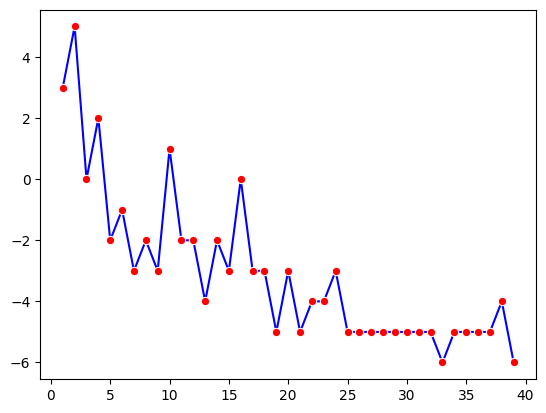

In [8]:
sns.lineplot(x = range(1, 40), y = error, marker = "o", color = "blue", markerfacecolor= "red")

In [9]:
#Taking neighbors as 19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.83      0.94      0.88        36

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



In [10]:
#Neighbours=29
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)	
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.83      0.94      0.88        36

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



In [11]:
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print("Accuracy:",accuracy)#Priting the Accuracy

Accuracy: 0.8032786885245902
